# Resuelve

La regresión logística es un tipo de modelo estadístico que se utiliza para predecir la probabilidad de que un evento ocurra, basado en uno o más predictores o variables independientes. 

## Sigue

La regresión logística utiliza la función sigmoide o logística, que mapea cualquier valor real entre 0 y 1, permitiendo interpretar los resultados como probabilidades.
  

  $$\sigma (z) = \frac{1}{1+e^{-x}}$$

Donde $z=\beta_0 + a_1\beta_1 + ..... +a_n\beta_n$

## Funciona

Cambiando los pesos de las variables para que se ajusten lo mjor posible, para reducir el error al maximo posible

## MLE

$$max{\sum{log P(y_i|x_i;h)}}$$

## Que distribución de probabilidad siguen mis datos?

Por cada experimento que hagamos en una distribución logistica solo podemos tener dos resultados. Por lo que la distribución que mejor se podria ajustar a este escenario es la distribución de bernoulli.

$P =
\begin{cases} 
p & \text{si } y=1 \\
1-p & \text{si } y=0 
\end{cases}
$


Para que nuestra función sea optima debemos de tener nuestra probabilidad de exito igual a uno

$\bar{p} = p * 1 + (1-p)*0$

Por lo que si reemplazamos esta formula con los parametros de la distribución bernoulli

$$L= \bar{p}.p + (1.\bar{p}).(1-p)$$

Si lo traducimos como los valores de nuestra distribución sigmoide la probabilidad p = y

$$L= \bar{y}.y + (1.\bar{y}).(1-y)$$

$$\text{MLE} = \sum \bar{y_i} \cdot y_i + (1 - \bar{y_i}) \cdot (1 - y_i)$$


$$\ln(\text{L}) = \sum \ln(\bar{y_i} \cdot y_i + (1 - \bar{y_i}) \cdot (1 - y_i))$$  
  
$$\ln(\text{L}) = \sum \bar{y_i} \cdot \ln(y_i) + (1 - \bar{y_i}) \cdot \ln((1 - y_i))$$  
  
$$\text{max}\ln(\text{L}) = \sum \ln(\bar{y_i} \cdot y_i + (1 - \bar{y_i}) \cdot (1 - y_i))$$  
  
$$\text{min}\ln(\text{L}) = -\sum \ln(\bar{y_i} \cdot y_i + (1 - \bar{y_i}) \cdot (1 - y_i)) = \text{cross entropy}$$

# En python

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [15]:
def likelihood(y,yp):
    return yp * y + (1-yp)*(1-y)

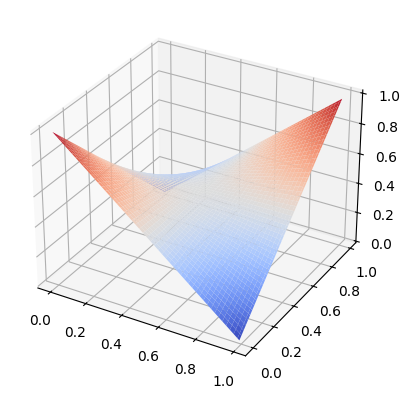

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = np.arange(0, 1, 0.01)
yp = np.arange(0, 1, 0.01)
y, yp = np.meshgrid(y,yp)
z = likelihood(y,yp)

sur = ax.plot_surface(y,yp, z,cmap='coolwarm')

In [21]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [23]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [24]:
x,y = load_iris(return_X_y=True)

In [26]:
clf = LogisticRegression(random_state=0,solver='liblinear').fit(x[:100],y[:100])

In [28]:
# Retorna los parametros que mejor ajustan nuestro modelo
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])